In [1]:
import pysmile
import pysmile_license
import numpy as np
import pandas as pd

from df_plot import plot_df 
from info_value_to_net import info_value_to_net
from get_info_values import mutual_info_measures, cond_kl_divergence
from save_info_values import save_info_values
from plots import plot_cond_mut_info, plot_relative_cond_mut_info, plot_cond_mut_info_bounds

np.seterr(divide='ignore', invalid = 'ignore')

# Read the network
net = pysmile.Network()
net.read_file("genie_models/Basic_ID_screening_current_read.xdsl")

In [2]:
net.clear_all_evidence()

net.set_evidence("Age", "age_4_adult")
net.set_evidence("Sex", "M")
net.set_evidence("SD", "SD_1_short")
net.set_evidence("PA", "PA_2")
net.set_evidence("Smoking", "sm_1_not_smoker")
net.set_evidence("BMI", "bmi_3_overweight")
net.set_evidence("Alcohol", "low")

net.update_beliefs()

print("David's probability of CRC:", net.get_node_value("CRC")[1])

David's probability of CRC: 0.0008571886717245085


In [3]:
net.clear_all_evidence()

net.set_evidence("Age", "age_2_young")
net.set_evidence("Sex", "M")
net.set_evidence("SD", "SD_1_short")
net.set_evidence("PA", "PA_2")
net.set_evidence("Smoking", "sm_1_not_smoker")
net.set_evidence("BMI", "bmi_2_normal")
net.set_evidence("Alcohol", "low")

net.update_beliefs()

print("Dani's probability of CRC:", net.get_node_value("CRC")[1])

Dani's probability of CRC: 0.00016487156854109932


####  Benchmarking for new screening devices

In [4]:
import pysmile
import pysmile_license
import numpy as np
import pandas as pd
import itertools
from plots import plot_cond_mut_info
from save_info_values import save_info_values
np.seterr(divide='ignore', invalid = 'ignore')

from df_plot import plot_df 
from info_value_to_net import info_value_to_net
from get_info_values import mutual_info_measures
from functions import system_of_eq, tanh_fun
from elicitation import parameter_elicitation_utilities

import yaml
with open('config.yaml', 'r') as file:
    cfg = yaml.safe_load(file)
import pdb

# Read the network -----------------------------------------------------
print("Reading network...")
net = pysmile.Network()
net.read_file("decision_models/DM_screening_benchmarking.xdsl")
# ----------------------------------------------------------------------

# ----------------------------------------------------------------------
print("Calculating relative pointwise conditional mutual information values...")

try:
    net.delete_arc("Results_of_Screening", "Colonoscopy")
except:
    print("No arc to delete")

value_function = "rel_pcmi"
df_value_scr, df_value_col = save_info_values(net, value_function = value_function, weighted=False)
net2 = info_value_to_net(df_value_scr, df_value_col, net)

# net2.add_arc("Results_of_Screening", "Colonoscopy")

print("Saving network...")
net2.write_file(f"decision_models/DM_screening_benchmarking.xdsl")
# ----------------------------------------------------------------------

Reading network...
Calculating relative pointwise conditional mutual information values...
No arc to delete
Saving network...


Plotting info functions...


array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.00103739, 0.00206642, ..., 0.00099158, 0.00049616,
        0.        ],
       [0.        , 0.00197461, 0.00393391, ..., 0.00239566, 0.00119919,
        0.        ],
       ...,
       [0.        , 0.00181761, 0.00362682, ..., 0.00320775, 0.00160662,
        0.        ],
       [0.        , 0.00197246, 0.00393399, ..., 0.00312239, 0.00156363,
        0.        ],
       [0.        , 0.00428744, 0.00848975, ..., 0.00676952, 0.00340012,
        0.        ]])

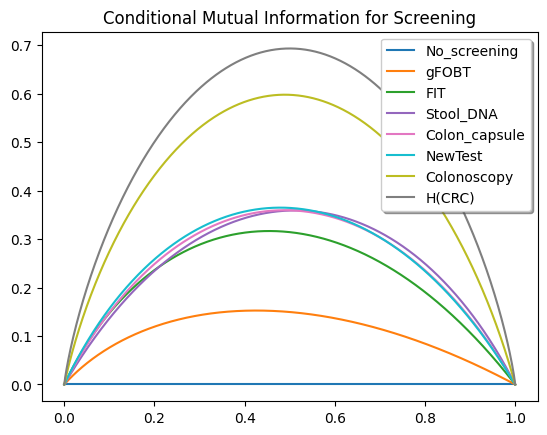

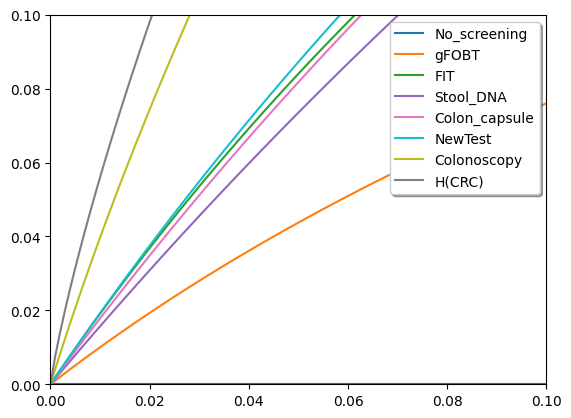

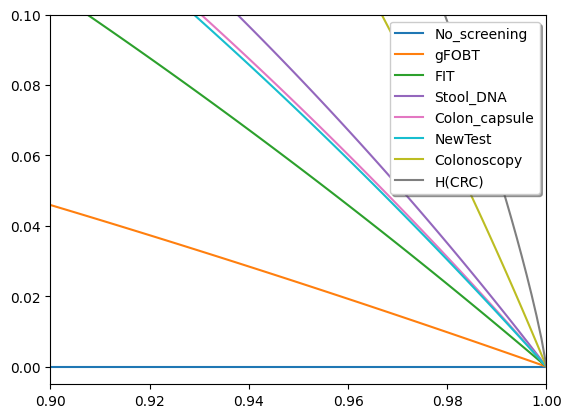

In [5]:
net = pysmile.Network()
net.read_file("decision_models/DM_screening_benchmarking.xdsl")

# ----------------------------------------------------------------------
print("Plotting info functions...")
plot_cond_mut_info(net, subtitle = 'benchmarking')
# ----------------------------------------------------------------------

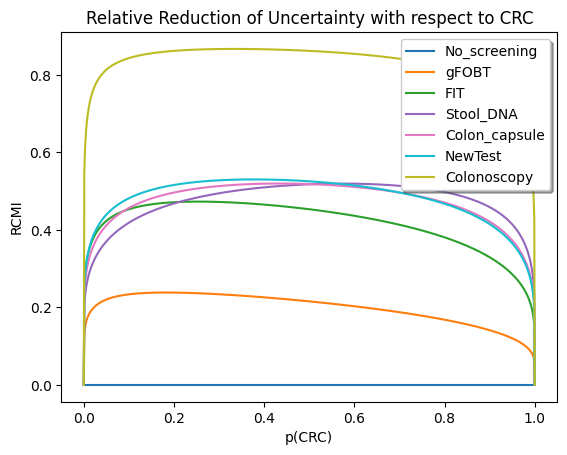

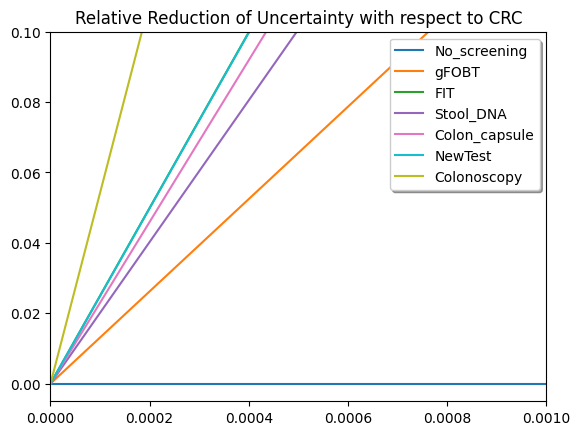

In [6]:
plot_relative_cond_mut_info(net, subtitle = 'benchmarking', zoom = (0.001, 0.1))

In [6]:
# get the number of classes in node "Screening"



In [9]:
import matplotlib.pyplot as plt
plt.rcParams['axes.prop_cycle'].by_key()['color']

['#1f77b4',
 '#ff7f0e',
 '#2ca02c',
 '#d62728',
 '#9467bd',
 '#8c564b',
 '#e377c2',
 '#7f7f7f',
 '#bcbd22',
 '#17becf']

In [10]:
import yaml
with open('config.yaml', 'r') as file:
    cfg = yaml.safe_load(file)

In [13]:
cfg['colors'].values()

dict_values(['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f'])